<a href="https://colab.research.google.com/github/BHOSALESHIVAM/Marketing-Campaign-for-Banking-Products/blob/master/Copy_of_Marketing_Campaign_for_Banking_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1) Import the datasets and libraries, check datatype, statistical summary, shape, null values etc

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path = "/content/Dataset.xlsx"

train = pd.read_excel(path)

train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
train.describe(include='all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
train.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# 2) Check if you need to clean the data for any of the variables

In [6]:
train = train.drop(['ZIP Code', 'ID'], axis = 1)

train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


# 3) EDA: Study the data distribution in each attribute and target variable, share your findings.

Target Variable

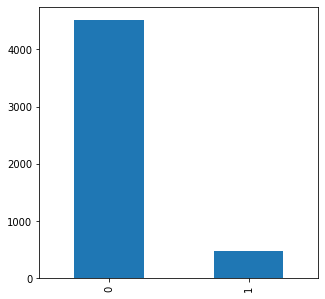

In [7]:
plt.figure(figsize=(5,5))
train['Personal Loan'].value_counts().plot.bar()

In [8]:
print("Number of unique in each column")
print()
for i in train.columns:
    print(i,"------------------->",train[i].unique().shape[0])

Number of unique in each column

Age -------------------> 45
Experience -------------------> 47
Income -------------------> 162
Family -------------------> 4
CCAvg -------------------> 108
Education -------------------> 3
Mortgage -------------------> 347
Personal Loan -------------------> 2
Securities Account -------------------> 2
CD Account -------------------> 2
Online -------------------> 2
CreditCard -------------------> 2


In [9]:
print("Number of people with zero mortgage ----------> ",train[train['Mortgage']==0].shape[0])

Number of people with zero mortgage ---------->  3462


In [10]:
print("Number of people with zero credit card spending per month ----------> ",train[train['CCAvg']==0].shape[0])

Number of people with zero credit card spending per month ---------->  106


In [11]:
print("Value counts of all categorical columns")
print()
for i in ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']:
    print(i,"-------->",train[i].value_counts())
    print()

Value counts of all categorical columns

Family --------> 1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

Education --------> 1    2096
3    1501
2    1403
Name: Education, dtype: int64

Personal Loan --------> 0    4520
1     480
Name: Personal Loan, dtype: int64

Securities Account --------> 0    4478
1     522
Name: Securities Account, dtype: int64

CD Account --------> 0    4698
1     302
Name: CD Account, dtype: int64

Online --------> 1    2984
0    2016
Name: Online, dtype: int64

CreditCard --------> 0    3530
1    1470
Name: CreditCard, dtype: int64



Univariate Analysis
Categorical Variables



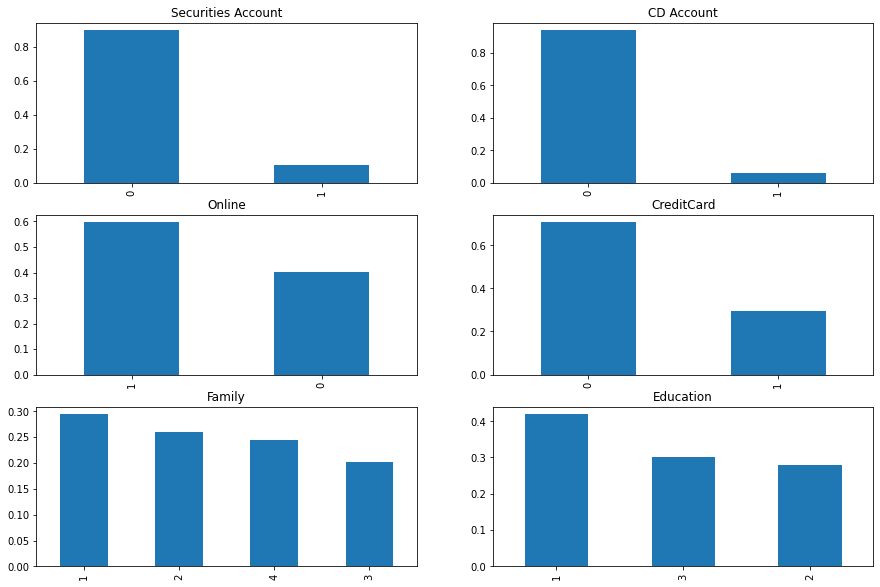

In [12]:
print("Univariate Analysis")
print("Categorical Variables")
print()

plt.figure(figsize=(15,10))  
for i,j in enumerate(['Securities Account', 'CD Account', 'Online', 'CreditCard', 'Family', 'Education']):
    plt.subplot(3,2,i+1) 
    train[j].value_counts(normalize=True).plot.bar(title= j)
plt.show()

Univariate Analysis
Categorical Variables



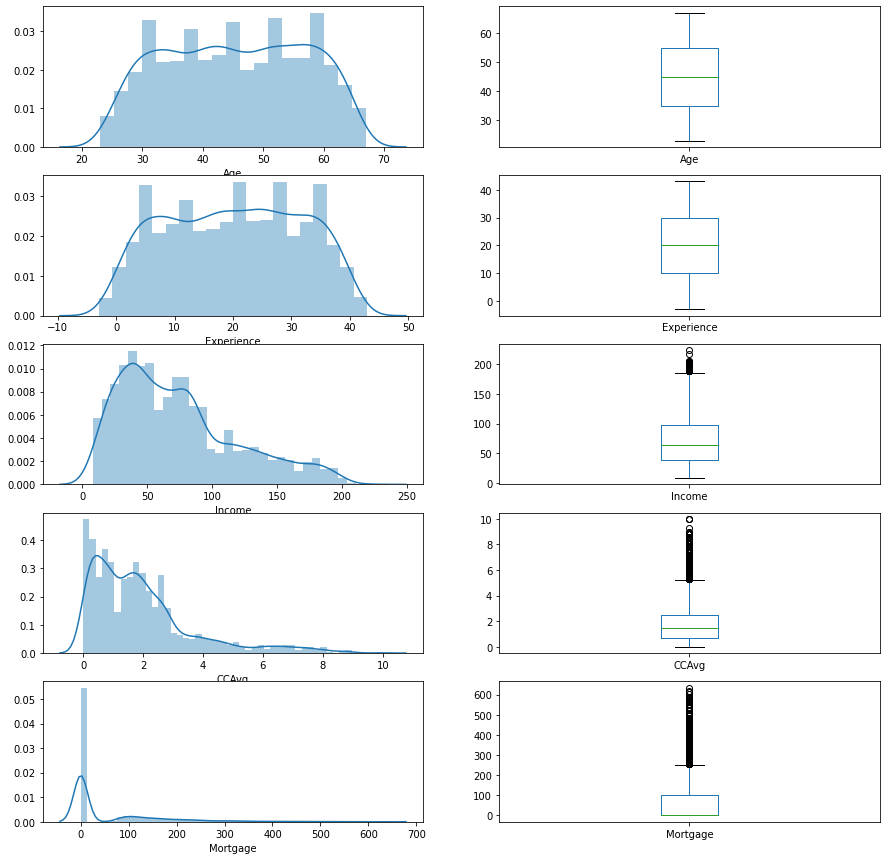

In [13]:
print("Univariate Analysis")
print("Categorical Variables")
print()

plt.figure(figsize=(15,15))  
count = 1
for j in (['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']):
    plt.subplot(5,2,count) 
    sns.distplot(train[j])
    count+=1
    plt.subplot(5,2,count)
    train[j].plot.box()
    count+=1
plt.show()

Categorical Independent Variable vs Target Variable

Bivariate Analysis
Categorical Variables



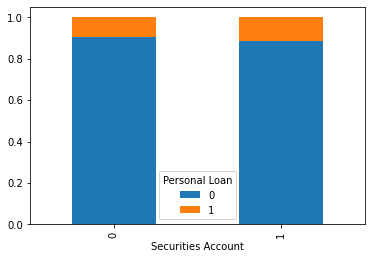

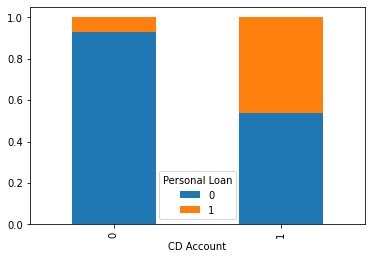

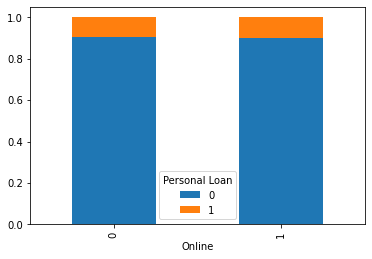

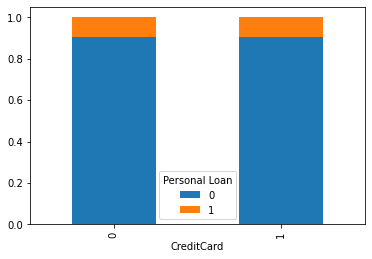

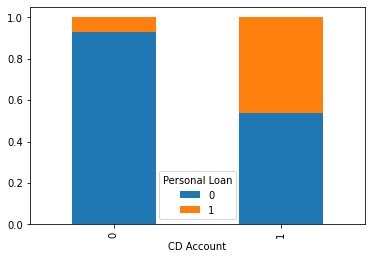

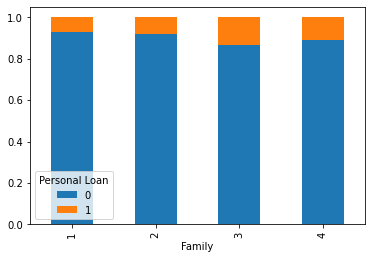

In [14]:
print("Bivariate Analysis")
print("Categorical Variables")
print()

SecuritiesAccount=pd.crosstab(train['Securities Account'],train['Personal Loan']) 
SecuritiesAccount.div(SecuritiesAccount.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

CDAccount=pd.crosstab(train['CD Account'],train['Personal Loan']) 
CDAccount.div(CDAccount.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

Online=pd.crosstab(train['Online'],train['Personal Loan']) 
Online.div(Online.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

CreditCard=pd.crosstab(train['CreditCard'],train['Personal Loan']) 
CreditCard.div(CreditCard.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

CDAccount=pd.crosstab(train['CD Account'],train['Personal Loan']) 
CDAccount.div(CDAccount.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

Family=pd.crosstab(train['Family'],train['Personal Loan']) 
Family.div(Family.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

Bivariate Analysis
Numerical Variables



Text(0, 0.5, 'Percentage')

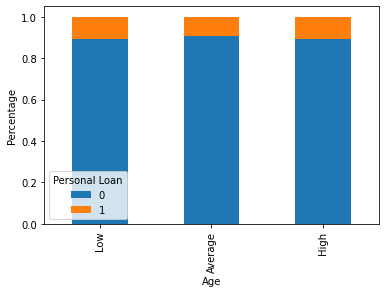

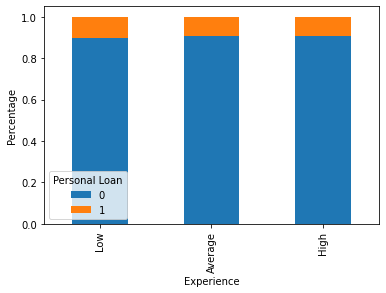

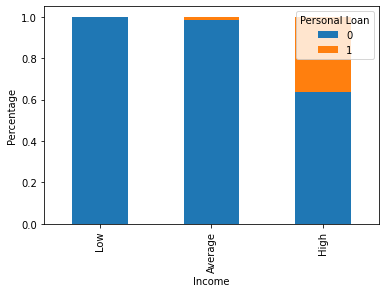

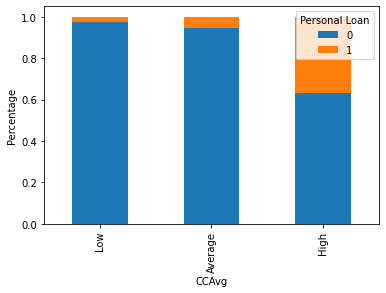

In [15]:
print("Bivariate Analysis")
print("Numerical Variables")
print()

bins=[0,30,60,90] 
group=['Low','Average','High'] 
train['Age_bin']=pd.cut(train['Age'],bins,labels=group)
Age_bin=pd.crosstab(train['Age_bin'],train['Personal Loan']) 
Age_bin.div(Age_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Age')
plt.ylabel('Percentage')

bins=[-60,10,30,60] 
group=['Low','Average','High'] 
train['Experience_bin']=pd.cut(train['Experience'],bins,labels=group)
Experience_bin=pd.crosstab(train['Experience_bin'],train['Personal Loan']) 
Experience_bin.div(Experience_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Experience')
plt.ylabel('Percentage')

bins=[0,40,100,300] 
group=['Low','Average','High'] 
train['Income_bin']=pd.cut(train['Income'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Personal Loan']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Income')
plt.ylabel('Percentage')

bins=[0,1,3,10] 
group=['Low','Average','High'] 
train['CCAvg_bin']=pd.cut(train['CCAvg'],bins,labels=group)
CCAvg_bin=pd.crosstab(train['CCAvg_bin'],train['Personal Loan']) 
CCAvg_bin.div(CCAvg_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CCAvg')
plt.ylabel('Percentage')

# 4) Apply necessary transformations for the feature variables

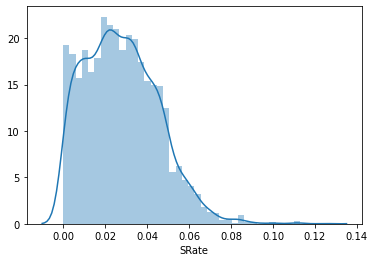

In [16]:
train['SRate'] = train['CCAvg'] / train['Income']
sns.distplot(train['SRate'])

In [17]:
features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
            'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
            'Online', 'CreditCard','SRate']

train = train[features]

print("train shape : ",train.shape)
train.head()

train shape :  (5000, 13)


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,SRate
0,25,1,49,4,1.6,1,0,0,1,0,0,0,0.032653
1,45,19,34,3,1.5,1,0,0,1,0,0,0,0.044118
2,39,15,11,1,1.0,1,0,0,0,0,0,0,0.090909
3,35,9,100,1,2.7,2,0,0,0,0,0,0,0.027000
4,35,8,45,4,1.0,2,0,0,0,0,0,1,0.022222


In [18]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [19]:
Age_l, Age_u = outlier_treatment(train.Age)
Experience_l, Experience_u = outlier_treatment(train.Experience)
Income_l, Income_u = outlier_treatment(train.Income)
Family_l, Family_u = outlier_treatment(train.Family)
CCAvg_l, CCAvg_u = outlier_treatment(train.CCAvg)
Mortgage_l, Mortgage_u = outlier_treatment(train.Mortgage)

In [20]:
train = train[
           (train.Age > Age_l) & (train.Age < Age_u) &
           (train.Experience > Experience_l) & (train.Experience < Experience_u) &
           (train.Income > Income_l) & (train.Income < Income_u) &
           (train.Family > Family_l) & (train.Family < Family_u) &
           (train.CCAvg > CCAvg_l) & (train.CCAvg < CCAvg_u) &
           (train.Mortgage > Mortgage_l) & (train.Mortgage < Mortgage_u)
]

print("train shape : ",train.shape)

train shape :  (4385, 13)


# 5) Normalise your data and split the data into training and test set in the ratio of 70:30

In [21]:
X = train.drop(['Personal Loan'], axis=1)
X = pd.get_dummies(X, columns=['Education'])

y = train['Personal Loan'].to_numpy().reshape([-1,1])

print("X shape : ",X.shape)
print("y shape : ",y.shape)

X shape :  (4385, 14)
y shape :  (4385, 1)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X_train shape : ",X_train.shape,
      "\nX_test shape : ",X_test.shape,
      "\ny_train shape : ",y_train.shape,
      "\ny_test shape : ",y_test.shape)

X_train shape :  (3069, 14) 
X_test shape :  (1316, 14) 
y_train shape :  (3069, 1) 
y_test shape :  (1316, 1)


# 6) Use the Logistic Regression model to predict the likelihood of a customer buying personal loans

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

para_grid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
             'dual' : ['bool', False],
             'C' : [0.01, 0.1, 1, 10],
             'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

lr_model = LogisticRegression(max_iter = 1000, n_jobs = -1).fit(X_train, y_train)
lr_model_grid = GridSearchCV(lr_model, para_grid).fit(X_train, y_train)
lr_model_grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-v

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10], 'dual': ['bool', False],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [24]:
print("For Logistic Regression model")
print("Best Estimators : ",lr_model_grid.best_estimator_)
print("Best Index : ",lr_model_grid.best_index_)
print("Best Params : ",lr_model_grid.best_params_)
print("Best Score : ",lr_model_grid.best_score_)

For Logistic Regression model
Best Estimators :  LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=-1, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
Best Index :  35
Best Params :  {'C': 0.01, 'dual': False, 'penalty': 'none', 'solver': 'newton-cg'}
Best Score :  0.9706781939625169


In [25]:
y_lr = lr_model_grid.predict(X_test).reshape([-1,1])

# 7) Print all the metrics related for evaluating the model performance

In [47]:
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, log_loss, mean_squared_log_error, mean_squared_error, mean_absolute_error

print("For Logistic Regression")
print()
print("Confusion Matrix : \n",confusion_matrix(y_test, y_lr))
print("F1 Score : ", round(f1_score(y_test, y_lr,3)))
print("Area Under the ROC curve Score : ", round(roc_auc_score(y_test, y_lr),3))
print("Log Loss : ", round(log_loss(y_test, y_lr),3))
print("Root Mean Squared Logarithmic Error : ", round(mean_squared_log_error(y_test, y_lr),3))
print("Root Mean Squared Error (RMSE) : ", round(mean_squared_error(y_test, y_lr),3))
print("Mean Absolute Error : ", round(mean_absolute_error(y_test, y_lr),3))

For Logistic Regression

Confusion Matrix : 
 [[1226    4]
 [  25   61]]
F1 Score :  1.0
Area Under the ROC curve Score :  0.853
Log Loss :  0.761
Root Mean Squared Logarithmic Error :  0.011
Root Mean Squared Error (RMSE) :  0.022
Mean Absolute Error :  0.022


# 8) Build various other classification algorithms and compare their performance

In [48]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_nb = nb_model.predict(X_test)

print("For Naïve Bayes")
print()
print("Confusion Matrix : \n",confusion_matrix(y_test, y_nb))
print("F1 Score : ", round(f1_score(y_test, y_nb,3)))
print("Area Under the ROC curve Score : ", round(roc_auc_score(y_test, y_nb),3))
print("Log Loss : ", round(log_loss(y_test, y_nb),3))
print("Root Mean Squared Logarithmic Error : ", round(mean_squared_log_error(y_test, y_nb),3))
print("Root Mean Squared Error (RMSE) : ", round(mean_squared_error(y_test, y_nb),3))
print("Mean Absolute Error : ", round(mean_absolute_error(y_test, y_nb),3))

For Naïve Bayes

Confusion Matrix : 
 [[1177   53]
 [  34   52]]
F1 Score :  1.0
Area Under the ROC curve Score :  0.781
Log Loss :  2.283
Root Mean Squared Logarithmic Error :  0.032
Root Mean Squared Error (RMSE) :  0.066
Mean Absolute Error :  0.066


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.linear_model import SGDClassifier

para_grid = {'eta0':[0.001,0.01,0.1,1,10,100]}

sgd_model = SGDClassifier(max_iter=1000, n_jobs=-1).fit(X_train, y_train)
sgd_model_grid = GridSearchCV(sgd_model, para_grid).fit(X_train, y_train)
sgd_model_grid.fit(X_train, y_train)
y_sgd = sgd_model_grid.predict(X_test)

In [29]:
print("For Stochastic Gradient Descent")
print("Best Estimators : ",sgd_model_grid.best_estimator_)
print("Best Index : ",sgd_model_grid.best_index_)
print("Best Params : ",sgd_model_grid.best_params_)
print("Best Score : ",sgd_model_grid.best_score_)

For Stochastic Gradient Descent
Best Estimators :  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=100, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
Best Index :  5
Best Params :  {'eta0': 100}
Best Score :  0.9445993697892036


In [49]:
print("For Stochastic Gradient Descent")
print()
print("Confusion Matrix : \n",confusion_matrix(y_test, y_nb))
print("F1 Score : ", round(f1_score(y_test, y_nb,3)))
print("Area Under the ROC curve Score : ", round(roc_auc_score(y_test, y_nb),3))
print("Log Loss : ", round(log_loss(y_test, y_nb),3))
print("Root Mean Squared Logarithmic Error : ", round(mean_squared_log_error(y_test, y_nb),3))
print("Root Mean Squared Error (RMSE) : ", round(mean_squared_error(y_test, y_nb),3))
print("Mean Absolute Error : ", round(mean_absolute_error(y_test, y_nb),3))

For Stochastic Gradient Descent

Confusion Matrix : 
 [[1177   53]
 [  34   52]]
F1 Score :  1.0
Area Under the ROC curve Score :  0.781
Log Loss :  2.283
Root Mean Squared Logarithmic Error :  0.032
Root Mean Squared Error (RMSE) :  0.066
Mean Absolute Error :  0.066


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

para_grid = {'n_neighbors':[5,10,20],
             'weights':['uniform','distance'],
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
             'leaf_size':[5,10,20]
             }
knn_model = KNeighborsClassifier(n_jobs=-1).fit(X_train, y_train)
knn_model_grid = GridSearchCV(knn_model, para_grid).fit(X_train, y_train)
knn_model_grid.fit(X_train, y_train)
y_knn = knn_model_grid.predict(X_test)

In [32]:
print("For K Neighbors Classifier")
print("Best Estimators : ",knn_model_grid.best_estimator_)
print("Best Index : ",knn_model_grid.best_index_)
print("Best Params : ",knn_model_grid.best_params_)
print("Best Score : ",knn_model_grid.best_score_)

For K Neighbors Classifier
Best Estimators :  KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                     weights='distance')
Best Index :  17
Best Params :  {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 20, 'weights': 'distance'}
Best Score :  0.9465638633090849


In [50]:
print("For K Neighbors Classifier")
print()
print("Confusion Matrix : \n",confusion_matrix(y_test, y_knn))
print("F1 Score : ", round(f1_score(y_test, y_knn,3)))
print("Area Under the ROC curve Score : ", round(roc_auc_score(y_test, y_knn),3))
print("Log Loss : ", round(log_loss(y_test, y_knn),3))
print("Root Mean Squared Logarithmic Error : ", round(mean_squared_log_error(y_test, y_knn),3))
print("Root Mean Squared Error (RMSE) : ", round(mean_squared_error(y_test, y_knn),3))
print("Mean Absolute Error : ", round(mean_absolute_error(y_test, y_knn),3))

For K Neighbors Classifier

Confusion Matrix : 
 [[1225    5]
 [  75   11]]
F1 Score :  0.0
Area Under the ROC curve Score :  0.562
Log Loss :  2.1
Root Mean Squared Logarithmic Error :  0.029
Root Mean Squared Error (RMSE) :  0.061
Mean Absolute Error :  0.061


In [34]:
from sklearn.tree import DecisionTreeClassifier

para_grid = {'criterion' : ['gini', 'entropy'],
              'splitter' : ['best', 'random'],
             'max_depth' : [None, 5, 10, 15],
             'min_samples_split' : [2, 4, 6],
             'min_samples_leaf' : [1,2,4],
             'max_features' : [None,'auto','sqrt','log2'],
             'max_leaf_nodes' : [None, 2,4,8],
             }
dt_model = DecisionTreeClassifier().fit(X_train, y_train)
dt_model_grid = GridSearchCV(dt_model, para_grid).fit(X_train, y_train)
dt_model_grid.fit(X_train, y_train)
y_dt = dt_model_grid.predict(X_test)

In [35]:
print("For Decision Tree")
print("Best Estimators : ",dt_model_grid.best_estimator_)
print("Best Index : ",dt_model_grid.best_index_)
print("Best Params : ",dt_model_grid.best_params_)
print("Best Score : ",dt_model_grid.best_score_)

For Decision Tree
Best Estimators :  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Best Index :  1736
Best Params :  {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 4, 'splitter': 'best'}
Best Score :  0.9827313739764388


In [51]:
print("For Decision Tree")
print()
print("Confusion Matrix : \n",confusion_matrix(y_test, y_dt))
print("F1 Score : ", round(f1_score(y_test, y_dt,3)))
print("Area Under the ROC curve Score : ", round(roc_auc_score(y_test, y_dt),3))
print("Log Loss : ", round(log_loss(y_test, y_dt),3))
print("Root Mean Squared Logarithmic Error : ", round(mean_squared_log_error(y_test, y_dt),3))
print("Root Mean Squared Error (RMSE) : ", round(mean_squared_error(y_test, y_dt),3))
print("Mean Absolute Error : ", round(mean_absolute_error(y_test, y_dt),3))

For Decision Tree

Confusion Matrix : 
 [[1223    7]
 [  19   67]]
F1 Score :  1.0
Area Under the ROC curve Score :  0.887
Log Loss :  0.682
Root Mean Squared Logarithmic Error :  0.009
Root Mean Squared Error (RMSE) :  0.02
Mean Absolute Error :  0.02


In [37]:
from sklearn.ensemble import RandomForestClassifier

para_grid = {'criterion' : ['gini', 'entropy'],
             'max_depth' : [None, 5, 10, 15],
             'min_samples_split' : [2, 4, 6],
             'min_samples_leaf' : [1,2,4],
             'max_features' : [None,'auto','sqrt','log2'],
             'max_leaf_nodes' : [None, 2,4,8],
             }
rf_model = RandomForestClassifier().fit(X_train, y_train.reshape([-1,]))
rf_model_grid = GridSearchCV(rf_model, para_grid).fit(X_train, y_train.reshape([-1,]))
rf_model_grid.fit(X_train, y_train.reshape([-1,]))
y_rf = rf_model_grid.predict(X_test).reshape([-1,1])

In [38]:
print("For Random Forest")
print("Best Estimators : ",rf_model_grid.best_estimator_)
print("Best Index : ",rf_model_grid.best_index_)
print("Best Params : ",rf_model_grid.best_params_)
print("Best Score : ",rf_model_grid.best_score_)

For Random Forest
Best Estimators :  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best Index :  612
Best Params :  {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score :  0.9850141611447943


In [52]:
print("For Random Forest")
print()
print("Confusion Matrix : \n",confusion_matrix(y_test, y_rf))
print("F1 Score : ", round(f1_score(y_test, y_rf,3)))
print("Area Under the ROC curve Score : ", round(roc_auc_score(y_test, y_rf),3))
print("Log Loss : ", round(log_loss(y_test, y_rf),3))
print("Root Mean Squared Logarithmic Error : ", round(mean_squared_log_error(y_test, y_rf),3))
print("Root Mean Squared Error (RMSE) : ", round(mean_squared_error(y_test, y_rf),3))
print("Mean Absolute Error : ", round(mean_absolute_error(y_test, y_rf),3))

For Random Forest

Confusion Matrix : 
 [[1229    1]
 [  20   66]]
F1 Score :  1.0
Area Under the ROC curve Score :  0.883
Log Loss :  0.551
Root Mean Squared Logarithmic Error :  0.008
Root Mean Squared Error (RMSE) :  0.016
Mean Absolute Error :  0.016


In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

para_grid = {'kernel':['linear','poly','rbf','sigmoid'],
             'class_weight':[None,'balanced']}
svc_model = SVC(max_iter=-1).fit(X_train, y_train.reshape([-1,]))
svc_model_grid = GridSearchCV(svc_model, para_grid).fit(X_train, y_train.reshape([-1,]))
svc_model_grid.fit(X_train, y_train.reshape([-1,]))
y_svc = svc_model_grid.predict(X_test).reshape([-1,1])

In [42]:
print("For Support Vector Machine")
print("Best Estimators : ",svc_model_grid.best_estimator_)
print("Best Index : ",svc_model_grid.best_index_)
print("Best Params : ",svc_model_grid.best_params_)
print("Best Score : ",svc_model_grid.best_score_)

For Support Vector Machine
Best Estimators :  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best Index :  0
Best Params :  {'class_weight': None, 'kernel': 'linear'}
Best Score :  0.9732840571546992


In [53]:
print("For Support Vector Machine")
print()
print("Confusion Matrix : \n",confusion_matrix(y_test, y_svc))
print("F1 Score : ", round(f1_score(y_test, y_svc,3)))
print("Area Under the ROC curve Score : ", round(roc_auc_score(y_test, y_svc),3))
print("Log Loss : ", round(log_loss(y_test, y_svc),3))
print("Root Mean Squared Logarithmic Error : ", round(mean_squared_log_error(y_test, y_svc),3))
print("Root Mean Squared Error (RMSE) : ", round(mean_squared_error(y_test, y_svc),3))
print("Mean Absolute Error : ", round(mean_absolute_error(y_test, y_svc),3))

For Support Vector Machine

Confusion Matrix : 
 [[1227    3]
 [  26   60]]
F1 Score :  1.0
Area Under the ROC curve Score :  0.848
Log Loss :  0.761
Root Mean Squared Logarithmic Error :  0.011
Root Mean Squared Error (RMSE) :  0.022
Mean Absolute Error :  0.022


In [ ]:
from xgboost import XGBClassifier

para_grid = {'n_estimators':[25,50,75],
             'max_depth':[2,4,8]}
xgb_model = XGBClassifier()
xgb_model_grid = GridSearchCV(xgb_model, para_grid).fit(X_train, y_train)
xgb_model_grid.fit(X_train, y_train)
y_xgb = xgb_model_grid.predict(X_test)

In [45]:
print("For XGBoost Classifier")
print("Best Estimators : ",xgb_model_grid.best_estimator_)
print("Best Index : ",xgb_model_grid.best_index_)
print("Best Params : ",xgb_model_grid.best_params_)
print("Best Score : ",xgb_model_grid.best_score_)

For XGBoost Classifier
Best Estimators :  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=75, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Best Index :  5
Best Params :  {'max_depth': 4, 'n_estimators': 75}
Best Score :  0.9827319053514779


In [54]:
print("For XGBoost Classifier")
print()
print("Confusion Matrix : \n",confusion_matrix(y_test, y_xgb))
print("F1 Score : ", round(f1_score(y_test, y_xgb,3)))
print("Area Under the ROC curve Score : ", round(roc_auc_score(y_test, y_xgb),3))
print("Log Loss : ", round(log_loss(y_test, y_xgb),3))
print("Root Mean Squared Logarithmic Error : ", round(mean_squared_log_error(y_test, y_xgb),3))
print("Root Mean Squared Error (RMSE) : ", round(mean_squared_error(y_test, y_xgb),3))
print("Mean Absolute Error : ", round(mean_absolute_error(y_test, y_xgb),3))

For XGBoost Classifier

Confusion Matrix : 
 [[1229    1]
 [  20   66]]
F1 Score :  1.0
Area Under the ROC curve Score :  0.883
Log Loss :  0.551
Root Mean Squared Logarithmic Error :  0.008
Root Mean Squared Error (RMSE) :  0.016
Mean Absolute Error :  0.016


# Decision Tree is the best model with AUC score = 0.89

# 9) Give a business understanding of your model

## Customer segments (the group of customers)

Age - between 30 to 60

Family size - 1 (single living)

Education - 2 (Graduate)

Online - 1 (Users doing Online Transactions)


## Value proposition (the offer for each customer segment)

Income - Above $100

CCAvg - Above $3

## Channels (How to reach customer segments)

Through social media and campaigns

## Customer Relationships (How to relate with customers over time)

Consider the customer equally likely